<img src="Task_12.png" alt="drawing" width="800"/>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy import signal

%matplotlib inline

Входные данные

99


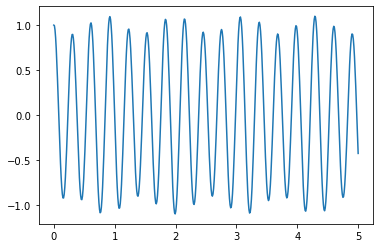

In [25]:
a_0 = 0.1
a_1 = 1

w_0 = 15
w_1 = 20.5


DURATION = 5
SAMPLE_RATE = 100


t = np.linspace(0, DURATION, SAMPLE_RATE*DURATION)

f = lambda t: a_0*np.sin(w_0*t) + a_1*np.cos(w_1*t)
F = f(t)

plt.plot(t, f(t))

window = signal.hann(99)
print(len(window))

In [26]:
yf = fft(window, F)
xf = fftfreq(DURATION*SAMPLE_RATE, 1/SAMPLE_RATE)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

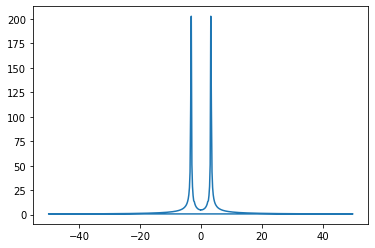

In [8]:
plt.figure()
A = fft(window, 2048) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))


plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Hann window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
#plt.plot(x)
plt.plot(xf, np.abs(yf))

In [28]:
import matplotlib.pyplot as plt

def file_writer(name_of_file, arr_1, arr_2):
    with open(name_of_file, "w") as file:
        for index in  range(len(arr_1)):
            file.write(str(arr_1[index]) + "\t" + str(arr_2[index]) + "\n")

def painter(arr_of_args, arr_of_val_1, arr_of_val_2, title_1, title_2):
    plt.figure(1)
    plt.title(title_1)
    plt.xlabel("Frequency")
    plt.ylabel("|f(w)| ^ 2")
    # plt.plot(arr_of_args, arr_of_val_1)
    plt.semilogy(arr_of_args, arr_of_val_1)

    plt.figure(2)
    plt.title(title_2)
    plt.xlabel("Frequency")
    plt.ylabel("|f(w)| ^ 2")
    # plt.plot(arr_of_args, arr_of_val_2)
    plt.semilogy(arr_of_args, arr_of_val_2)
    plt.show()

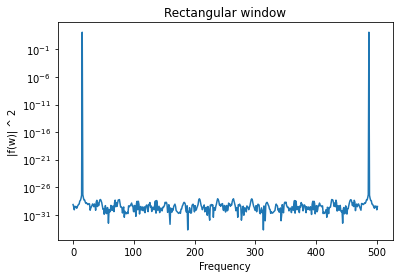

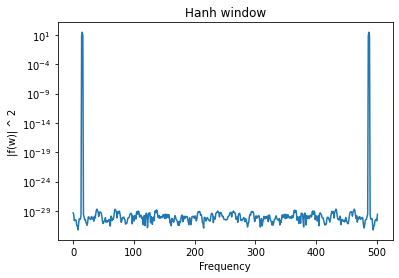

In [84]:
import numpy as np


freq_zero = float(input("Please, enter a frequency of sinus: "))
size_of_window = int(input("Please, enter integer size of the window: "))
max_val = 2 * np.pi * (1 - 1. / size_of_window)
tick = max_val / size_of_window
x = np.linspace(0, max_val, size_of_window)
# Rectangular window.
rect_window_values_abs_square = (np.abs(np.fft.fft(np.sin(freq_zero * x))) ** 2) / size_of_window
# Hahn window.
Hanh_window_values_abs_square = (np.abs(np.fft.fft(np.hanning(size_of_window + 1)[0:size_of_window] * np.sin(freq_zero * x))) ** 2) / size_of_window

frequencies = np.linspace(0, 2 * np.pi / tick, size_of_window)
# Painting of data.
painter(frequencies, rect_window_values_abs_square, Hanh_window_values_abs_square, "Rectangular window", "Hanh window")


In [36]:

size_of_window = int(input("Please, enter integer size of the window: "))
max_val = 2 * np.pi * (1 - 1. / size_of_window)
tick = max_val / size_of_window
x = np.linspace(0, max_val, size_of_window)
# Rectangular window.
rect_window_values_abs_square = (np.abs(np.fft.fft(f(x)))) / size_of_window
# Hahn window.
Hanh_window_values_abs_square = (np.abs(np.fft.fft(np.hanning(size_of_window + 1)[0:size_of_window] *f(x))) ** 2) / size_of_window


[0.001      0.0012562  0.00182908 0.00253108 0.00330857 0.00415409
 0.00507612 0.00609178 0.00722593 0.00851285 0.01000003 0.01175476
 0.01387569 0.0165137  0.01991199 0.02554983 0.03104024 0.04125865
 0.05955535 0.10209887 0.31440269 0.32212448 0.10982961 0.06730403
 0.04903439 0.03885233 0.03234815 0.02782567 0.02449327 0.02193176
 0.01989842 0.01824292 0.01686719 0.01570451 0.0147079  0.01384331
 0.01308547 0.01241519 0.01181769 0.01128134 0.01079689 0.01035691
 0.00995532 0.0095871  0.00924812 0.00893488 0.00864443 0.00837429
 0.00812229 0.0078866  0.00766562 0.00745794 0.00726236 0.0070778
 0.00690331 0.00673806 0.0065813  0.00643236 0.00629065 0.00615563
 0.00602683 0.00590379 0.00578613 0.00567349 0.00556554 0.00546198
 0.00536254 0.00526697 0.00517504 0.00508654 0.00500126 0.00491904
 0.0048397  0.00476309 0.00468907 0.0046175  0.00454827 0.00448124
 0.00441632 0.00435341 0.00429241 0.00423323 0.0041758  0.00412002
 0.00406583 0.00401317 0.00396196 0.00391214 0.00386367 0.00381

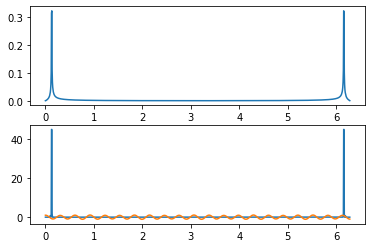

In [38]:
A = rect_window_values_abs_square
B = Hanh_window_values_abs_square
print(A, B)
plt.subplot(211)
plt.plot(x, A)
plt.subplot(212)
plt.plot(x, B)
plt.plot(x, f(x))

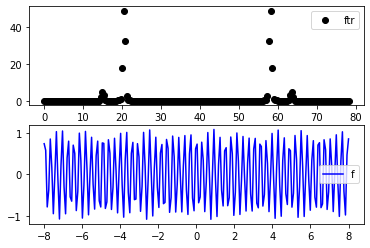

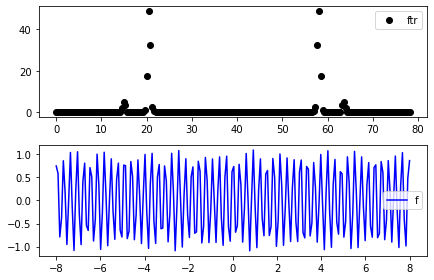

In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt


w = 15
w2 = 20.5
N = 200

t1 = -8
t2 = 8

def f(x):
    return 0.1*np.sin(w*x) + np.cos(w2*x)
    #return np.exp(1j*x*w*pi)
#    return np.exp(-x)
def h(k, n):
    return 0.5*(1-cos(2*pi*k/n))


def DFT(f, N, t1, t2):
    x = np.linspace(t1, t2, N, endpoint = False)
    ftr = []
    w0 = []
    for i in range(0, N):
        ftri = 0
        for k in range(0, N) :
            ftri += f(*[x[k]])*np.exp(2*pi*(1j)*i*k/N)*h(k,N)
            #ftri += f(*[x[k]])*np.exp(2*pi*(1j)*i*k/N)
        ftr.append(abs(ftri))
        w0.append(2*pi*i/(t2-t1))
        #w0.append(i)
    return [w0, ftr]


x = np.linspace(t1, t2, N)
[w0, ftr] = DFT(f, N, t1, t2)


plt.subplot(211)
plt.plot(w0, ftr, 'ko', label = 'ftr')
plt.legend()
plt.subplot(212)
plt.plot(x, f(x), 'b-', label = 'f')
plt.legend()
plt.tight_layout()
plt.show()